##### Unione dataset

In [1]:
from fastai.tabular.all import *
from warnings import simplefilter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
set_seed(42)
simplefilter(action="ignore", category=FutureWarning)

*Pulizia dati cromosoma 22*

In [2]:
df = pd.read_csv('clinvar.22.dbnsfp.vcf', sep='\t')
df = df.apply(lambda x: x.str.split(';') if x.dtype == "object" else x)
df = df.map(lambda x: x.remove('') if type(x) is list and '' in x else x)

l = []

for col in df.columns:
    if df[col].apply(lambda x: len(x) if type(x) is list else list()).equals(df['aapos'].apply(lambda x: len(x) if type(x) is list else list())):
        l.append(col)

l.append('TSL')
df = df.explode(l)
df = df.map(lambda x: x[0] if type(x) is list and len(x) == 1 else x)
df.replace(to_replace='.', value=np.nan, inplace=True)
df.dropna(axis='rows', how='any', inplace=True, subset=['clinvar_clnsig'])
####
#df.dropna(axis='columns', thresh=int(len(df.index)*0.8), inplace=True)
####
df = df.apply(pd.to_numeric, errors='ignore')


l1 = []

for col in df.columns:
    if df[col].map(lambda x: True if type(x) is list else False).any():
        l1.append(col)

for col in l1:
    v = df[col].explode().value_counts()
    toRemove = v[v < int(len(df[col].explode()) * 0.10)].index
    df[col] = df[col].map(lambda x: [i for i in x if i not in toRemove] if type(x) is list else x)

/tmp/ipykernel_78459/1942847823.py:1: DtypeWarning: Columns (98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clinvar.22.dbnsfp.vcf', sep='\t')


In [3]:
df.apply(pd.to_numeric, errors='ignore')
#df.replace(to_replace=np.nan, value=0, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'not_provided'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'protective'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'drug_response'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'association'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Affects'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'other'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'drug_response,_risk_factor'].index, inplace=True)
df.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
df.replace(to_replace='Benign/Likely_benign', value='Likely_benign', inplace=True)
df.replace(to_replace='Likely_benign,_other', value='Likely_benign', inplace=True)
df.replace(to_replace='Likely_benign,_drug_response,_other', value='Likely_benign', inplace=True)
df.replace(to_replace='Benign/Likely_benign,_other', value='Likely_benign', inplace=True)
df.replace(to_replace='Pathogenic/Likely_pathogenic', value='Likely_pathogenic', inplace=True)
df.replace(to_replace='Benign/Likely_benign,_risk_factor', value='Likely_pathogenic', inplace=True)
df.reset_index(drop=True, inplace=True)

*Pulizia cromosoma 21*

In [4]:
df1 = pd.read_csv('clinvar.hg19.chr21.dbnsfp.tsv', sep='\t')
df1 = df1.apply(lambda x: x.str.split(';') if x.dtype == "object" else x)
df1 = df1.map(lambda x: x.remove('') if type(x) is list and '' in x else x)

l = []

for col in df1.columns:
    if df1[col].apply(lambda x: len(x) if type(x) is list else list()).equals(df1['aapos'].apply(lambda x: len(x) if type(x) is list else list())):
        l.append(col)

l.append('TSL')
df1 = df1.explode(l)
df1 = df1.map(lambda x: x[0] if type(x) is list and len(x) == 1 else x)
df1.replace(to_replace='.', value=np.nan, inplace=True)
df1.dropna(axis='rows', how='any', inplace=True, subset=['clinvar_clnsig'])
#####
#df1.dropna(axis='columns', thresh=int(len(df1.index)*0.8), inplace=True)
#####
df1 = df1.apply(pd.to_numeric, errors='ignore')


l1 = []

for col in df1.columns:
    if df1[col].map(lambda x: True if type(x) is list else False).any():
        l1.append(col)

for col in l1:
    v = df1[col].explode().value_counts()
    toRemove = v[v < int(len(df1[col].explode()) * 0.10)].index
    df1[col] = df1[col].map(lambda x: [i for i in x if i not in toRemove] if type(x) is list else x)

/tmp/ipykernel_78459/800033988.py:1: DtypeWarning: Columns (98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('clinvar.hg19.chr21.dbnsfp.tsv', sep='\t')


In [5]:
df1.apply(pd.to_numeric, errors='ignore')
#df1.replace(to_replace=np.nan, value=0, inplace=True)
df1.drop(axis='index', labels=df1[df1.clinvar_clnsig == 'not_provided'].index, inplace=True)
df1.drop(axis='index', labels=df1[df1.clinvar_clnsig == 'protective'].index, inplace=True)
df1.drop(axis='index', labels=df1[df1.clinvar_clnsig == 'risk_factor'].index, inplace=True)
df1.drop(axis='index', labels=df1[df1.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
df1.drop(axis='index', labels=df1[df1.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
df1.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
df1.replace(to_replace='Benign/Likely_benign', value='Benign', inplace=True)
df1.replace(to_replace='Pathogenic/Likely_pathogenic', value='Pathogenic', inplace=True)
df1.reset_index(drop=True, inplace=True)

*Pulizia cromosoma 20*

In [6]:
df2 = pd.read_csv('dbsnp.common.20.intervar.hg19_multianno.txt', sep='\t')
df2 = df2.drop(df2[df2['CLNSIG'] == '.'].index)
df2 = df2.map(lambda x: x.split(';') if type(x) is str and len(x.split(';')) > 1 else x)
df2 = df2.map(lambda x: x.remove('') if type(x) is list and '' in x else x)
l = []

for col in df2.columns:
    if df2[col].apply(lambda x: True if type(x) is list and len(x) > 2 else False).any():
        l.append(col)

for col in l:
    if col == 'Interpro_domain':
        df2 = df2.explode(col)
    else:
        df2.drop(col, axis=1, inplace=True)

df2 = df2.map(lambda x: x[0] if type(x) is list else x)
df2.replace(to_replace='.', value=np.nan, inplace=True)
df2.dropna(axis='rows', how='any', inplace=True, subset=['CLNSIG'])
#df2.dropna(axis='columns', thresh=int(len(df2.index)*0.8), inplace=True)
df2 = df2.apply(pd.to_numeric, errors='ignore')

df2.apply(pd.to_numeric, errors='ignore')
#df2.replace(to_replace=np.nan, value=0, inplace=True)
df2.drop(axis='index', labels=df2[df2.CLNSIG == 'not_provided'].index, inplace=True)
df2.drop(axis='index', labels=df2[df2.CLNSIG == 'protective'].index, inplace=True)
df2.drop(axis='index', labels=df2[df2.CLNSIG == 'risk_factor'].index, inplace=True)
df2.drop(axis='index', labels=df2[df2.CLNSIG == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
df2.drop(axis='index', labels=df2[df2.CLNSIG == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
df2.drop(axis='index', labels=df2[df2.CLNSIG == 'association'].index, inplace=True)
df2.drop(axis='index', labels=df2[df2.CLNSIG == 'drug_response'].index, inplace=True)
df2.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
df2.replace(to_replace='Benign/Likely_benign', value='Benign', inplace=True)
df2.replace(to_replace='Pathogenic/Likely_pathogenic', value='Pathogenic', inplace=True)
df2.reset_index(drop=True, inplace=True)
df2 = df2.rename({"CLNSIG": "clinvar_clnsig", "Ref": "ref", "Alt": "alt", "Chr": "#chr"}, axis="columns")

In [23]:
a = np.intersect1d(df.columns, df1.columns)
b = np.intersect1d(df2.columns, a)
df_concat = pd.concat([df[b], df1[b], df2[b]])
df_concat.dropna(axis='columns', thresh=int(len(df2.index)*0.8), inplace=True)
df_concat.replace(to_replace=np.nan, value=0, inplace=True)

In [24]:
l2 = []

for col in df_concat.columns:
    if df_concat[col].map(lambda x: True if type(x) is list else False).any():
        l2.append(col)

df_concat.drop(axis='columns', labels=l2, inplace=True)

In [47]:
df_concat['clinvar_clnsig'].value_counts()

clinvar_clnsig
Uncertain_significance    30442
Pathogenic                 5161
Benign                     4511
Likely_pathogenic          3186
Likely_benign              2452
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

df_concat, df_test = train_test_split(df_concat, test_size=0.2)

In [26]:
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df_concat))
df_data = df_concat.drop(columns=['clinvar_clnsig'], inplace=False)
num_cols = df_data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_data.select_dtypes(include=[object]).columns.tolist()
df_concat = df_concat.sample(frac=1).reset_index(drop=True)

In [27]:
to = TabularPandas(df_concat, procs=[Categorify, FillMissing],
                   cat_names = cat_cols,
                   cont_names = num_cols,
                   y_names='clinvar_clnsig',
                    y_block=CategoryBlock(),
                   splits=splits)

In [28]:
dls = to.dataloaders(bs=1024)
dls.show_batch()

,BayesDel_addAF_pred,BayesDel_noAF_pred,ClinPred_pred,DEOGEN2_pred,FATHMM_pred,Interpro_domain,LIST-S2_pred,LRT_pred,M-CAP_pred,MetaLR_pred,MetaRNN_pred,MetaSVM_pred,MutPred_score,MutationAssessor_pred,PROVEAN_pred,Polyphen2_HDIV_pred,Polyphen2_HVAR_pred,PrimateAI_pred,SIFT4G_pred,SIFT_pred,alt,fathmm-MKL_coding_pred,fathmm-XF_coding_pred,ref,#chr,BayesDel_addAF_rankscore,BayesDel_addAF_score,BayesDel_noAF_rankscore,BayesDel_noAF_score,CADD_phred,CADD_raw,CADD_raw_rankscore,ClinPred_rankscore,ClinPred_score,DANN_rankscore,DANN_score,DEOGEN2_rankscore,DEOGEN2_score,Eigen-PC-raw_coding,Eigen-PC-raw_coding_rankscore,Eigen-raw_coding,Eigen-raw_coding_rankscore,FATHMM_converted_rankscore,FATHMM_score,GERP++_NR,GERP++_RS,GERP++_RS_rankscore,GenoCanyon_rankscore,GenoCanyon_score,LIST-S2_rankscore,LIST-S2_score,LRT_converted_rankscore,LRT_score,M-CAP_rankscore,M-CAP_score,MPC_rankscore,MPC_score,MVP_rankscore,MVP_score,MetaLR_rankscore,MetaLR_score,MetaRNN_rankscore,MetaRNN_score,MetaSVM_rankscore,MetaSVM_score,MutPred_rankscore,MutationAssessor_rankscore,MutationAssessor_score,MutationTaster_converted_rankscore,PROVEAN_converted_rankscore,PROVEAN_score,Polyphen2_HDIV_rankscore,Polyphen2_HDIV_score,Polyphen2_HVAR_rankscore,Polyphen2_HVAR_score,PrimateAI_rankscore,PrimateAI_score,REVEL_rankscore,REVEL_score,SIFT4G_converted_rankscore,SIFT4G_score,SIFT_converted_rankscore,SIFT_score,SiPhy_29way_logOdds,SiPhy_29way_logOdds_rankscore,VEST4_rankscore,VEST4_score,fathmm-MKL_coding_rankscore,fathmm-MKL_coding_score,fathmm-XF_coding_rankscore,fathmm-XF_coding_score,integrated_confidence_value,integrated_fitCons_rankscore,integrated_fitCons_score,phastCons100way_vertebrate,phastCons100way_vertebrate_rankscore,phastCons30way_mammalian,phastCons30way_mammalian_rankscore,phyloP100way_vertebrate,phyloP100way_vertebrate_rankscore,phyloP30way_mammalian,phyloP30way_mammalian_rankscore,clinvar_clnsig
0,T,T,T,0,D,0,D,N,D,T,T,T,0.711,L,N,B,B,T,T,T,A,N,N,G,21.0,0.00000,0.000000,0.0000,0.000000,22.600000,2.591628,0.43249,0.17385,0.153582,0.33195,0.972830,0.64326,0.000000,0.000000,0.00000,0.000000,0.00000,0.86010,-2.08,0.00,0.00,0.000,0.44867,0.999880,0.67374,0.904610,0.10636,6.367700e-01,0.61750,0.044968,0.22720,0.000000,0.79566,0.797556,0.69985,0.3324,0.47911,0.303823,0.62373,-0.6578,0.84684,0.26193,1.040,0.28399,0.20358,-0.72,0.24971,0.005,0.14941,0.008,0.44887,0.543124,0.71705,0.400,0.33219,0.143,0.28271,0.128,0.000000,0.00000,0.34336,0.284,0.28426,0.49404,0.22095,0.111629,0.0,0.57023,0.695654,0.181,0.24076,1.000,0.86279,1.477,0.35039,1.041,0.51395,Uncertain_significance
1,T,D,T,D,D,PTP type protein phosphatase|PTP type protein phosphatase|PTP type protein phosphatase,D,D,D,D,T,D,0,M,D,D,D,T,T,D,C,D,D,T,20.0,0.60500,0.067000,0.8940,0.327000,26.700001,3.863000,0.77500,0.08800,0.071000,0.93700,0.999000,0.89700,0.659000,0.767000,0.87400,0.759000,0.83500,0.84400,-1.87,5.79,5.79,0.918,0.74800,1.000000,0.92100,0.978000,0.84300,0.000000e+00,0.86800,0.202000,0.88500,1.591000,0.89000,0.892000,0.86900,0.6280,0.00500,0.022000,0.89000,0.3940,0.00000,0.53900,1.990,0.81000,0.74700,-4.08,0.77900,0.999,0.83200,0.991,0.76200,0.762000,0.97200,0.898,0.54900,0.080,0.91300,0.000,16.117001,0.81100,0.94200,0.936,0.60200,0.94100,0.91400,0.929000,0.0,0.25200,0.554000,1.000,0.71600,1.000,0.86300,8.017,0.88700,1.138,0.64700,Likely_benign
2,D,D,0,0,0,0,0,D,0,0,0,0,0,0,0,0,0,0,0,0,T,D,N,C,21.0,0.94964,0.522349,0.9489,0.512542,37.000000,7.273990,0.97495,0.00000,0.000000,0.90326,0.998200,0.00000,0.000000,0.754311,0.86478,0.859398,0.89638,0.00000,0.00,0.00,0.00,0.000,0.45129,0.999891,0.00000,0.000000,0.84330,0.000000e+00,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.0000,0.00000,0.000000,0.00000,0.0000,0.00000,0.00000,0.000,0.81001,0.00000,0.00,0.00000,0.000,0.00000,0.000,0.00000,0.000000,0.00000,0.000,0.00000,0.000,0.00000,0.000,0.000000,0.00000,0.98065,0.970,0.43489,0.84407,0.22451,0.113878,0.0,0.97449,0.736574,1.000,0.71638,0.999,0.70432,3.293,0.51486,1.018,0.39106,

In [67]:
learn = tabular_learner(dls, metrics=accuracy, loss_func=FocalLossFlat(gamma=5))

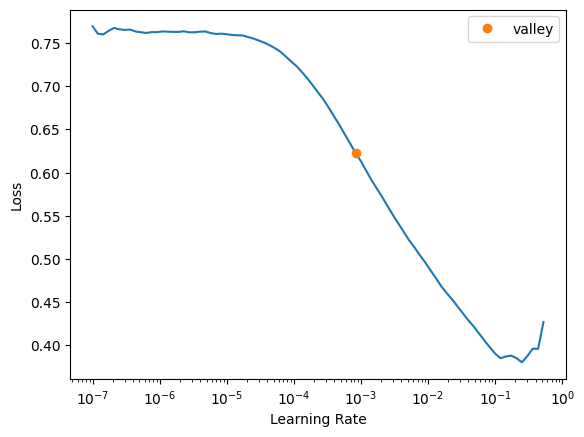

In [68]:
lr = learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.019299,0.043339,0.897923,00:00
1,0.017652,0.046702,0.902186,00:00
2,0.016566,0.040542,0.912568,00:00
3,0.015783,0.042694,0.910601,00:00
4,0.014605,0.042500,0.887650,00:00
5,0.013334,0.041432,0.915847,00:00
6,0.012992,0.043515,0.913989,00:00
7,0.013085,0.045295,0.911038,00:00
8,0.012052,0.042609,0.917596,00:00
9,0.010988,0.042577,0.920328,00:00


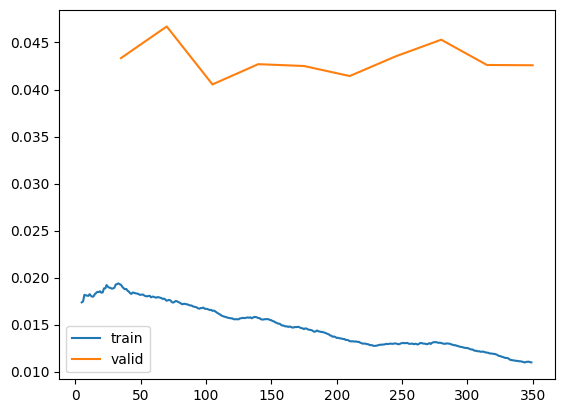

In [70]:
learn.fit(10, lr)
learn.recorder.plot_loss()

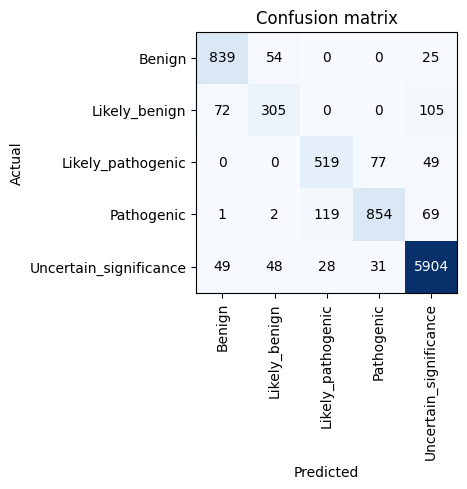

In [71]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [72]:
test_dl = dls.test_dl(df_test)
learn.validate(dl=test_dl)

(#2) [0.04113154858350754,0.9293583035469055]

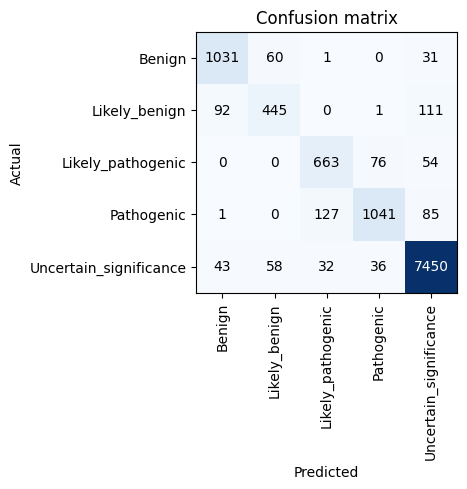

In [73]:
interp = ClassificationInterpretation.from_learner(learn, dl=test_dl)
interp.plot_confusion_matrix()

In [36]:
to_test = TabularPandas(df_test, procs=[Categorify, FillMissing], cat_names = cat_cols, cont_names = num_cols, y_names='clinvar_clnsig', y_block=CategoryBlock())

In [37]:
X_test = to_test.train.xs
y_test = to_test.train.ys.values.ravel()

*Gradient Boosting*

In [38]:
splits = RandomSplitter(valid_pct=0.0, seed=42)(range_of(df_concat))
df_data = df_concat.drop(columns=['clinvar_clnsig'], inplace=False)
num_cols = df_data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_data.select_dtypes(include=[object]).columns.tolist()
df_concat = df_concat.sample(frac=1).reset_index(drop=True)

to2 = TabularPandas(df_concat, procs=[Categorify, FillMissing],
                   cat_names = cat_cols,
                   cont_names = num_cols,
                   y_names='clinvar_clnsig',
                    y_block=CategoryBlock(),
                   splits=splits)

X_train, y_train = to2.train.xs, to2.train.ys.values.ravel()

In [39]:
gb = GradientBoostingClassifier()

In [40]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [41]:
p = gb.predict(X_test)

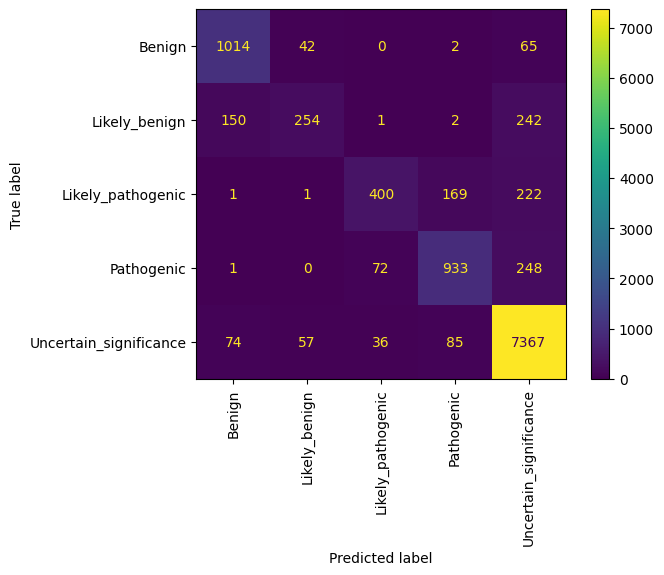

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dls.vocab)
disp.plot(xticks_rotation='vertical')

*Random Forest*

In [43]:
rfc = RandomForestClassifier(random_state=42, max_features='log2', max_depth=30, criterion='gini', min_samples_leaf=1)

In [44]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', random_state=42)

In [45]:
pred=rfc.predict(X_test)

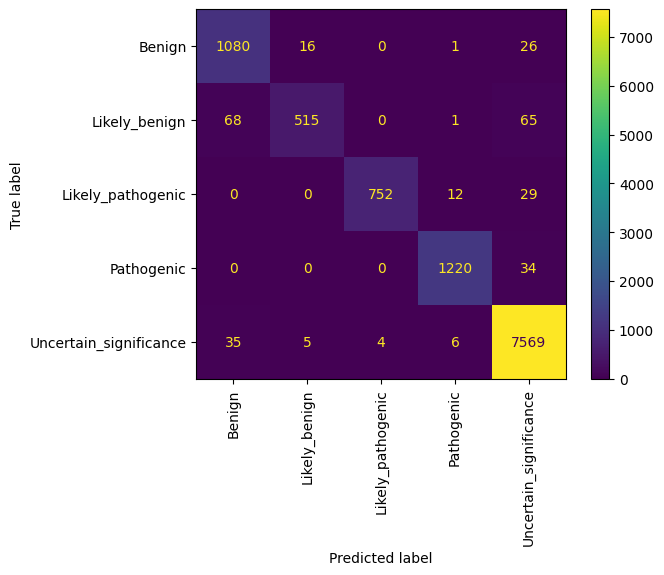

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dls.vocab)
disp.plot(xticks_rotation='vertical')

*Voting classifier*

In [74]:
class FastAITabularClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, dls, layers, metrics):
        self.dls = dls
        self.layers = layers
        self.metrics = metrics
        self.learn = None

    def fit(self, X, y):
        # Convert X, y into a FastAI DataLoaders
        self.learn = tabular_learner(self.dls, metrics=self.metrics, loss_func=FocalLossFlat(gamma=5))
        lr = self.learn.lr_find()
        self.learn.fit(15, lr) # You can adjust the training method and epochs
        return self

    def predict_proba(self, X):
        dl = self.dls.test_dl(X, with_labels=False)
        preds, _ = self.learn.get_preds(dl=dl)
        return preds.numpy()
        #return preds.argmax(dim=1).numpy()

In [75]:
fastai_model = FastAITabularClassifier(dls, layers=[200,100], metrics=accuracy)

In [76]:
voting_clf = VotingClassifier(estimators=[
    ('rf', rfc),
    ('gbm', gb),
    ('fastai', fastai_model)
], voting='soft')

epoch,train_loss,valid_loss,accuracy,time
0,0.246409,0.204916,0.789945,00:00
1,0.191152,0.156623,0.823934,00:00
2,0.159333,0.132777,0.828197,00:00
3,0.133137,0.111416,0.845792,00:00
4,0.109396,0.102002,0.849290,00:00
5,0.090514,0.083643,0.848634,00:00
6,0.073765,0.067679,0.861530,00:00
7,0.059445,0.061273,0.877486,00:00
8,0.049156,0.053373,0.867760,00:00
9,0.039729,0.046392,0.887650,00:00


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=30,
                                                     max_features='log2',
                                                     random_state=42)),
                             ('gbm', GradientBoostingClassifier()),
                             ('fastai',
                              FastAITabularClassifier(dls=<fastai.tabular.data.TabularDataLoaders object at 0x7fd31234a5c0>,
                                                      layers=[200, 100],
                                                      metrics=<function accuracy at 0x7fd32b793c70>))],
                 voting='soft')

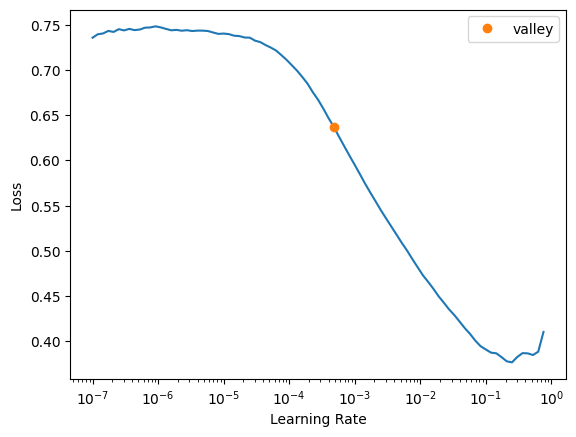

In [77]:
voting_clf.fit(X_train, y_train)

0.9452701521244973

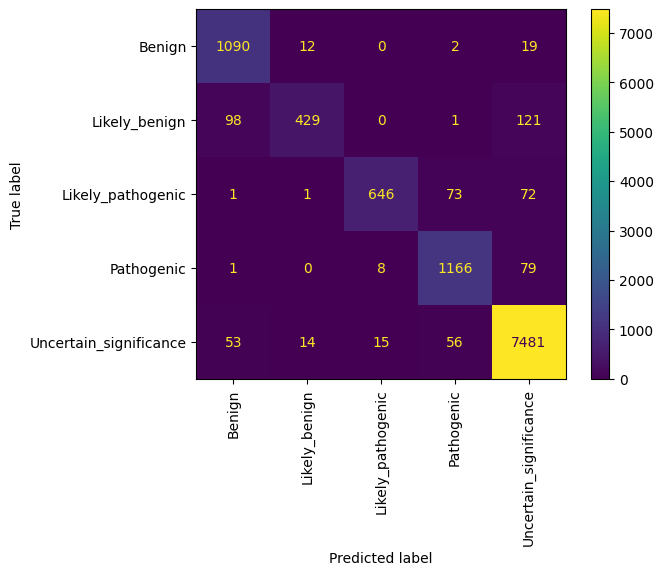

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

X_test = to_test.train.xs
y_test = to_test.train.ys.values.ravel()
predictions =  voting_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dls.vocab)
disp.plot(xticks_rotation='vertical')
accuracy_score(y_test, predictions)